In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

import os
import json
from src.functions import *
import random
import datetime

from src.simple_TF_continuos import *

import absl.logging #prevent checkpoint warnings while training

absl.logging.set_verbosity(absl.logging.ERROR)

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


satis  norm score [90. 90. 88. 62.]
satis  average: [4.5 4.5 4.4 3.1]
easy  norm score [90. 92. 74. 58.]
easy  average: [4.5 4.6 3.7 2.9]
safe  norm score [ 88.  92. 100.  82.]
safe  average: [4.4 4.6 5.  4.1]
natural  norm score [78. 96. 80. 62.]
natural  average: [3.9 4.8 4.  3.1]
predictable  norm score [96. 72. 88. 48.]
predictable  average: [4.8 3.6 4.4 2.4]
interactions  norm score [34. 26. 40. 78.]
interactions  average: [1.7 1.3 2.  3.9]
failures  norm score [14.  0. 16.  6.]
failures  average: [0.7 0.  0.8 0.3]


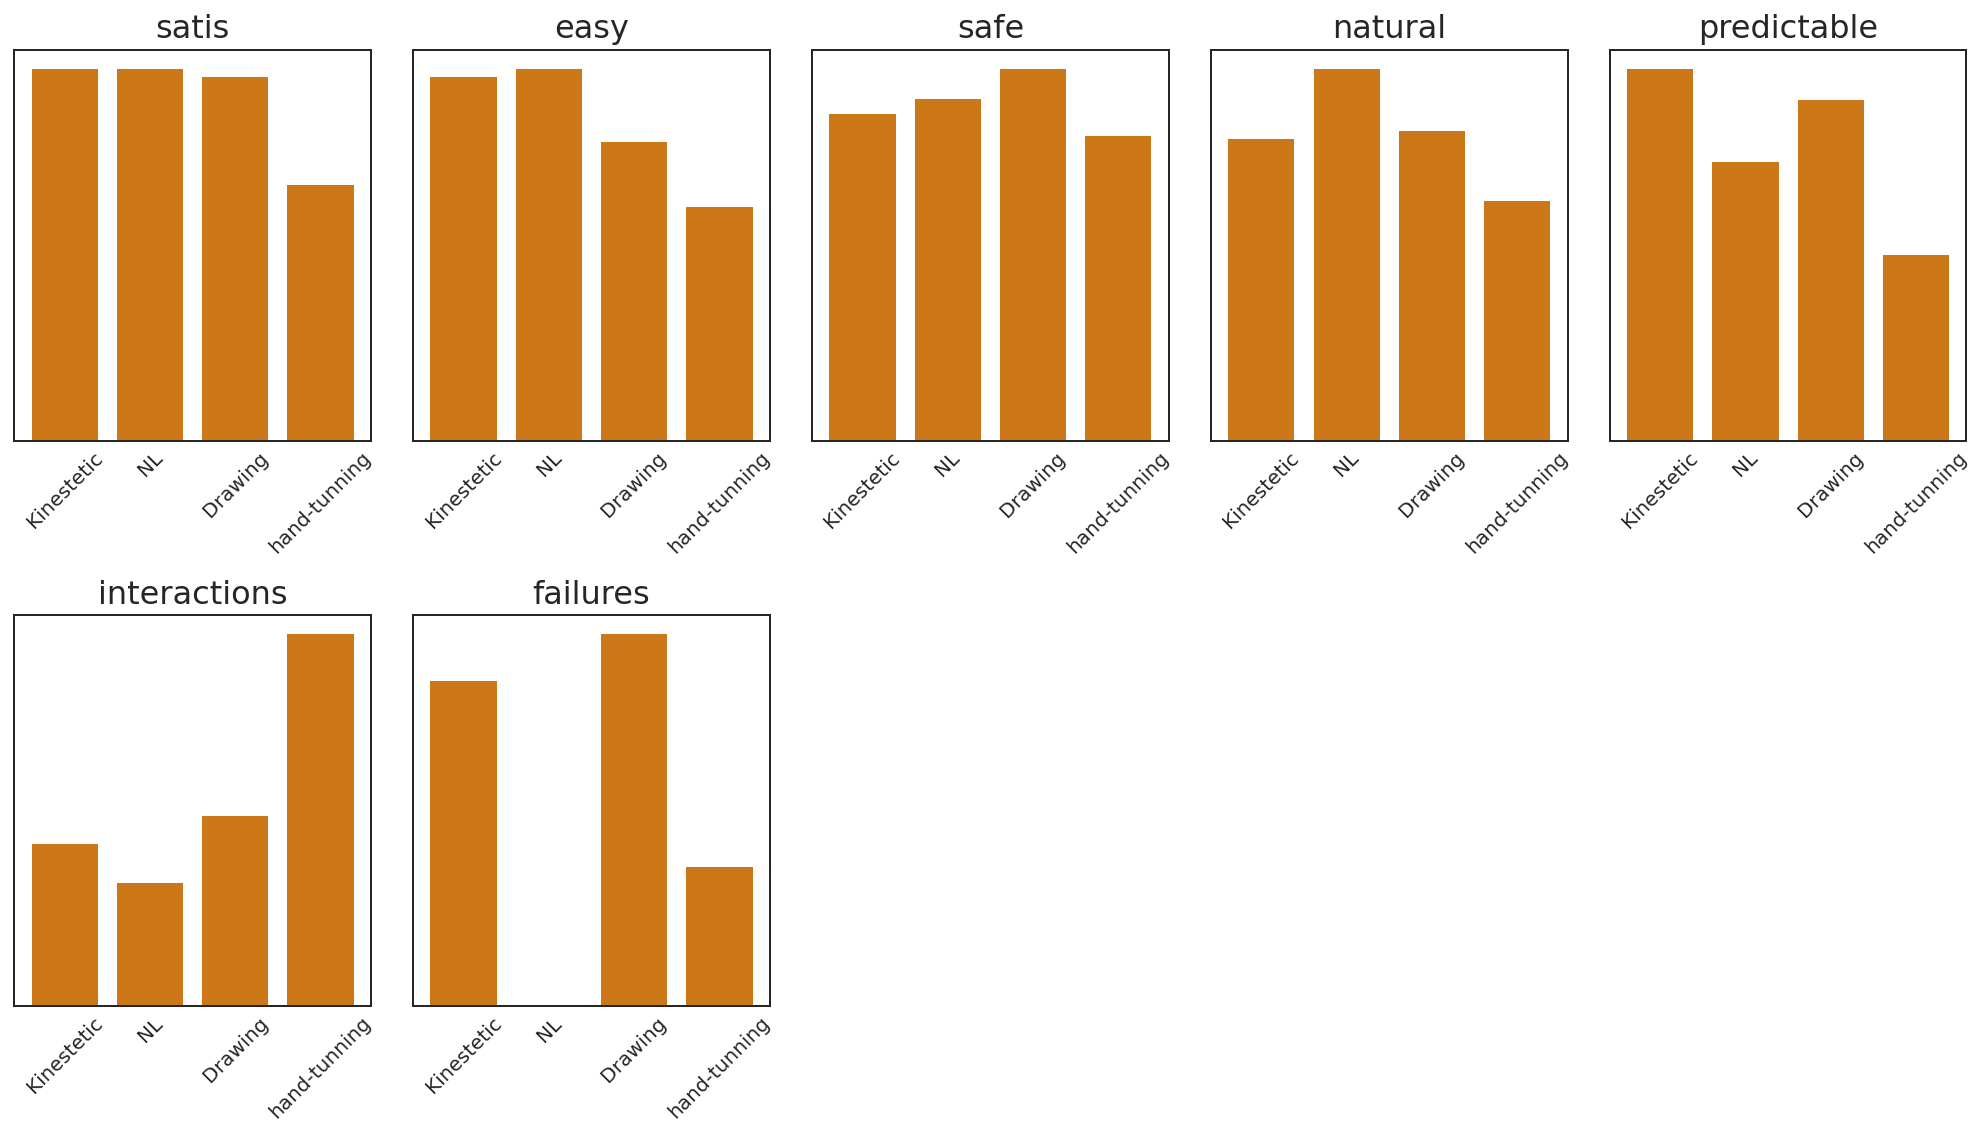

perf_order  norm score [50. 30. 50. 20.]
perf_order  average: [2.  1.2 2.  0.8]
easy_order  norm score [52.5 57.5 40.   0. ]
easy_order  average: [2.1 2.3 1.6 0. ]
time_order  norm score [42.5 50.  52.5  5. ]
time_order  average: [1.7 2.  2.1 0.2]


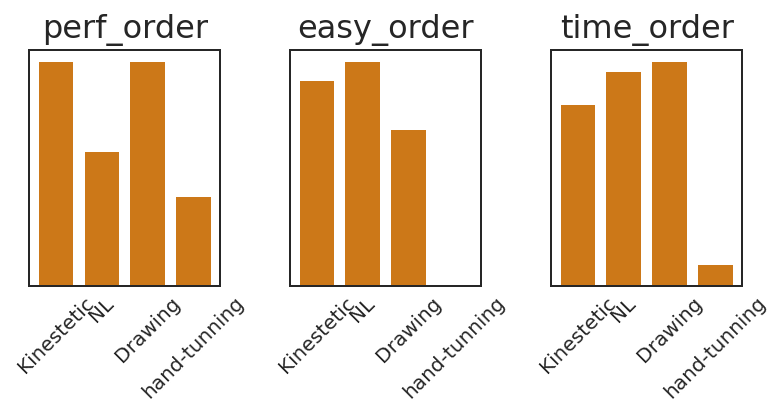

In [47]:
plt.rcParams["font.family"] = "Times New Roman"
user_data = [
             {'name': "user1", "satis":[2,4,5,4], "easy":[3,5,4,3], "safe":[1,2,5,5], "natural":[4,5,4,3],"predictable":[4,3,4,4],"interactions":[1,1,1,5], "failures":[0,0,0,0], "perf_order":"cadb","easy_order":"cbad","time_order":"cabd"},
             {'name': "user2", "satis":[5,4,5,1], "easy":[5,3,5,1], "safe":[5,4,5,1], "natural":[5,5,5,0],"predictable":[5,1,5,0],"interactions":[1,2,1,7], "failures":[0,0,0,1], "perf_order":"acbd","easy_order":"acbd","time_order":"cabd"},
             {'name': "user3", "satis":[5,4,2,1], "easy":[4,5,1,3], "safe":[3,5,5,4], "natural":[1,4,2,4],"predictable":[5,2,4,1],"interactions":[2,2,4,3], "failures":[0,0,2,2], "perf_order":"acdb","easy_order":"abcd","time_order":"abcd"},
             {'name': "user4", "satis":[5,5,5,5], "easy":[4,4,4,4], "safe":[5,5,5,5], "natural":[4,5,5,5],"predictable":[5,5,5,5],"interactions":[2,1,4,4], "failures":[1,0,2,0], "perf_order":"dcab","easy_order":"abcd","time_order":"bacd"},
             {'name': "user5", "satis":[4,5,4,3], "easy":[5,5,3,1], "safe":[5,5,5,3], "natural":[4,5,4,3],"predictable":[5,4,5,1],"interactions":[1,1,3,3], "failures":[0,0,2,0], "perf_order":"bacd","easy_order":"bacd","time_order":"bacd"},
             {'name': "user6", "satis":[4,5,4,3], "easy":[5,5,3,1], "safe":[5,5,5,3], "natural":[4,5,4,3],"predictable":[5,4,5,1],"interactions":[1,1,3,3], "failures":[0,0,2,0], "perf_order":"bacd","easy_order":"bacd","time_order":"bacd"},
             {'name': "user7", "satis":[5,3,5,2], "easy":[5,5,5,4], "safe":[5,5,5,5], "natural":[3,5,3,3],"predictable":[5,5,5,5],"interactions":[1,1,1,3], "failures":[0,0,0,0], "perf_order":"cabd","easy_order":"cbad","time_order":"cbad"},
             {'name': "user8", "satis":[5,5,5,5], "easy":[5,5,5,4], "safe":[5,5,5,5], "natural":[4,5,5,3],"predictable":[5,5,5,4],"interactions":[2,1,1,5], "failures":[1,0,0,0], "perf_order":"cabd","easy_order":"bcad","time_order":"bcad"},
             {'name': "user9", "satis":[5,5,5,4], "easy":[4,5,5,4], "safe":[5,5,5,5], "natural":[5,5,5,4],"predictable":[5,4,5,3],"interactions":[5,1,1,5], "failures":[5,0,0,0], "perf_order":"cdba","easy_order":"abcd","time_order":"cbad"},
             {'name': "user10", "satis":[5,5,4,3], "easy":[5,4,2,4], "safe":[5,5,5,5], "natural":[5,4,3,3],"predictable":[4,3,1,0],"interactions":[1,2,1,1], "failures":[0,0,0,0], "perf_order":"abdc","easy_order":"bacd","time_order":"cdab"}            
             ]
interaction_name = ["Kinestetic", "NL", "Drawing", "hand-tunning"]       
questions = ["satis","easy","safe","natural","predictable","interactions","failures"]     
criteria  = ["perf_order", "easy_order", "time_order"]
plot_questions(user_data,questions,interaction_name, file="/home/gari/ros_ws/src/motion_refiner/media/users_study_questions.svg")
plot_criteria(user_data,criteria,interaction_name,file="/home/gari/ros_ws/src/motion_refiner/media/users_study_criteria.svg")



In [39]:
interactions_average = np.array([1.77777778, 1.33333333, 1.88888889, 4.])
failures_average =  np.array([0.77777778, 0.0, 0.66666667, 0.33333333])
100-(failures_average/interactions_average)*100

array([ 56.24999993, 100.        ,  64.7058822 ,  91.66666675])

In [45]:
t=np.array([[2*60+22, 3*60+10, 4*60, 5*60+0],
[4*60+25, 0*60+30, 2*30, 5*60+10],
[0*37+10, 0*60+25, 2*30, 4*60+3]])
np.mean(t,axis=0)



array([139.        ,  81.66666667, 120.        , 284.33333333])